1️⃣ Load the Dataset
Load the CSV file into a pandas DataFrame.
Display the first 5 rows of the dataset.

2️⃣ Feature Selection
Extract the following columns:
pickup_latitude
pickup_longitude
Store them in a variable named X.

3️⃣ Data Preprocessing
Apply StandardScaler to scale the selected features.
Store the scaled data in X_scaled.

4️⃣ DBSCAN Model – Experiment 1
Apply DBSCAN with:
eps = 0.2
min_samples = 5
Store cluster labels in labels_1.

5️⃣ DBSCAN Model – Experiment 2
Apply DBSCAN with:
eps = 0.3
min_samples = 5
Store cluster labels in labels_2.

6️⃣ DBSCAN Model – Experiment 3
Apply DBSCAN with:
eps = 0.5
min_samples = 5
Store cluster labels in labels_3.

7️⃣ Cluster Evaluation
For each experiment:
Print:
Number of clusters (excluding noise)
Number of noise points
Noise ratio

8️⃣ Silhouette Score Calculation
Remove noise points (-1) from each experiment.
Calculate and print the Silhouette Score for:
Experiment 1
Experiment 2
Experiment 3
If silhouette score is not applicable, print "Not Applicable".

9️⃣ Visualization
For each experiment:
Plot pickup locations using a scatter plot.
Color points based on cluster labels.
Highlight noise points using a separate color.

🔟 Best Model Selection
Based on:
Number of clusters
Noise ratio
Silhouette score
Print:
Best eps value = ___
 

In [3]:
import pandas as pd
import numpy as np

df=pd.read_csv('test.csv')
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [4]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

In [5]:
X=df[['pickup_latitude','pickup_longitude']]

X.head()

,pickup_latitude,pickup_longitude
0,40.732029,-73.988129
1,40.679993,-73.964203
2,40.737583,-73.997437
3,40.771900,-73.956070
4,40.761475,-73.970215


In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(
    X
)
x_scaled[:5]


array([[-0.63316009, -0.19777295],
       [-2.37654633,  0.12824066],
       [-0.4470762 , -0.32460222],
       [ 0.70265642,  0.23906034],
       [ 0.35336571,  0.04632143]])

In [ ]:
from sklearn.cluster import DBSCAN
dbscan1=DBSCAN(eps=0.2,min_samples=5)
dbscan1=dbscan1.fit_predict(x_scaled)

# dbscan2 = DBSCAN(eps=0.3, min_samples=5)
# labels_2 = dbscan2.fit_predict(x_scaled)

# dbscan3=DBSCAN(eps=0.5,min_samples=5)
# labels_3=dbscan3.fit_predict(x_scaled)


First 5 rows:
        pickup_longitude  pickup_latitude
556071        -73.782387        40.644550
26039         -74.391907        40.719036
462559        -73.995476        40.759659
531432        -73.976837        40.764366
442137        -73.972519        40.753754

Results for eps = 0.2
Number of clusters: 8
Number of noise points: 118
Noise ratio: 0.0024
Silhouette Score: 0.581773726246182


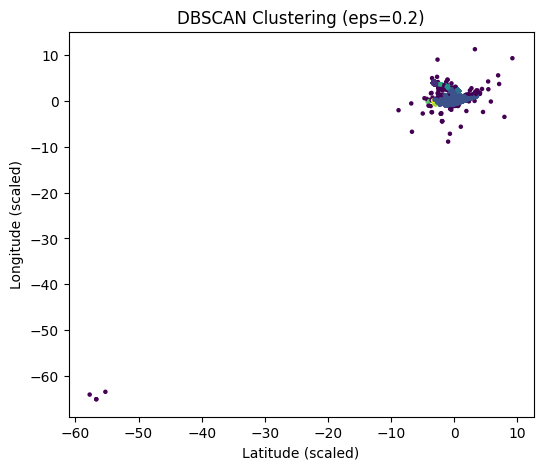


Results for eps = 0.3
Number of clusters: 3
Number of noise points: 84
Noise ratio: 0.0017
Silhouette Score: 0.6005620992531183


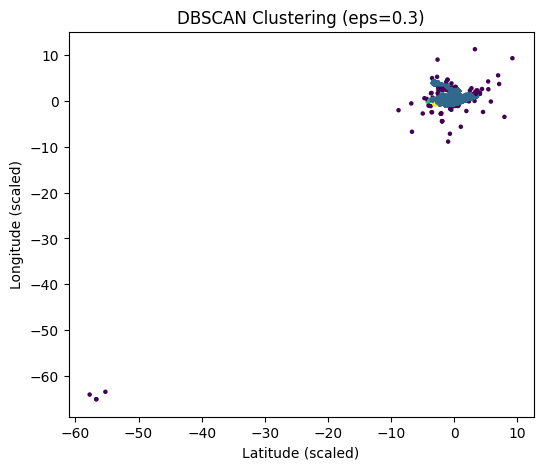


Results for eps = 0.5
Number of clusters: 1
Number of noise points: 58
Noise ratio: 0.0012
Silhouette Score: Not Applicable


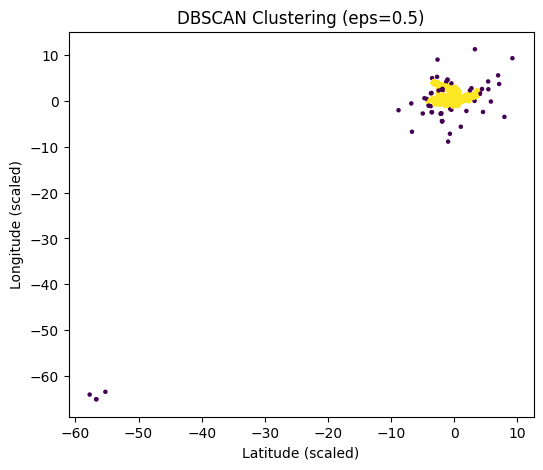


Best eps value = 0.3


In [2]:
# ==============================
# 1️⃣ Load Dataset (Large File Safe)
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load only required columns to save memory
file_path = "test.csv"   # change to your file name

df = pd.read_csv(
    file_path,
    usecols=['pickup_latitude', 'pickup_longitude']
)

# OPTIONAL but recommended for big datasets:
# Take sample to make DBSCAN fast
df = df.sample(n=50000, random_state=42)   # adjust sample size if needed

print("First 5 rows:")
print(df.head())


# ==============================
# 2️⃣ Feature Selection
# ==============================

X = df[['pickup_latitude', 'pickup_longitude']]


# ==============================
# 3️⃣ Data Preprocessing
# ==============================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# ==============================
# Function for DBSCAN experiment
# ==============================

def run_dbscan(eps_value):

    model = DBSCAN(eps=eps_value, min_samples=5)
    labels = model.fit_predict(X_scaled)

    # Cluster evaluation
    unique_labels = set(labels)
    n_clusters = len(unique_labels - {-1})
    noise_points = list(labels).count(-1)
    noise_ratio = noise_points / len(labels)

    print(f"\nResults for eps = {eps_value}")
    print("Number of clusters:", n_clusters)
    print("Number of noise points:", noise_points)
    print("Noise ratio:", round(noise_ratio, 4))

    # Silhouette Score (remove noise)
    mask = labels != -1

    if len(set(labels[mask])) > 1:
        score = silhouette_score(X_scaled[mask], labels[mask])
        print("Silhouette Score:", score)
    else:
        score = None
        print("Silhouette Score: Not Applicable")

    # Visualization
    plt.figure(figsize=(6,5))

    # Plot clusters
    plt.scatter(
        X_scaled[:,0],
        X_scaled[:,1],
        c=labels,
        s=5
    )

    plt.title(f"DBSCAN Clustering (eps={eps_value})")
    plt.xlabel("Latitude (scaled)")
    plt.ylabel("Longitude (scaled)")
    plt.show()

    return labels, n_clusters, noise_ratio, score


# ==============================
# 4️⃣ Experiment 1
# ==============================

labels_1, clusters_1, noise_1, sil_1 = run_dbscan(0.2)


# ==============================
# 5️⃣ Experiment 2
# ==============================

labels_2, clusters_2, noise_2, sil_2 = run_dbscan(0.3)


# ==============================
# 6️⃣ Experiment 3
# ==============================

labels_3, clusters_3, noise_3, sil_3 = run_dbscan(0.5)


# ==============================
# 🔟 Best Model Selection
# ==============================

results = [
    (0.2, clusters_1, noise_1, sil_1),
    (0.3, clusters_2, noise_2, sil_2),
    (0.5, clusters_3, noise_3, sil_3)
]

# Simple rule:
# Higher silhouette + lower noise is better

best_eps = None
best_score = -999

for eps, clusters, noise, sil in results:
    if sil is not None:
        score = sil - noise   # combined metric
        if score > best_score:
            best_score = score
            best_eps = eps

print("\nBest eps value =", best_eps)
